In [12]:
from autoscraper import AutoScraper
import string
import pandas as pd
import numpy as np

In [4]:
url = 'https://www.amazon.in/Noise-ColorFit-Display-Monitoring-Smartwatches/dp/B09NVPSCQT/ref=sr_1_1_sspa?crid=162EE09PDLR9L&keywords=smart%2Bwatch&qid=1656834537&refinements=p_89%3ANoise&rnid=3837712031&s=electronics&sprefix=smart%2Bwatch%2Caps%2C398&sr=1-1-spons&spLa=ZW5jcnlwdGVkUXVhbGlmaWVyPUFDNTNWS0tSTklGMVkmZW5jcnlwdGVkSWQ9QTAzNjIyOTcySkFJM1E3WEw5UEI5JmVuY3J5cHRlZEFkSWQ9QTA1NjcyMTMyQUVMTjdDNVAxMjVCJndpZGdldE5hbWU9c3BfYXRmJmFjdGlvbj1jbGlja1JlZGlyZWN0JmRvTm90TG9nQ2xpY2s9dHJ1ZQ&th=1'

# We can add one or multiple candidates here.
# You can also put urls here to retrieve urls.
wanted_list = ["Best beautiful looking watch @Rs 1999","Looks good beautiful.... smooth functioning.... no metal body .best watch @1999.looking forward.bettery backup is also good and fast charging also..how ever metallic body would have been great."]

scraper = AutoScraper()
result = scraper.build(url, wanted_list)
print(result)

['Best beautiful looking watch @Rs 1999', 'Overall a good product!', 'Wark nhi kr rhi ha ritan', 'Value for money', 'only whatsapp and text messages notification received rest not showing bad', 'Same notification comes multiple time', 'Awesome watch, truly India’s calling smartwatch', 'This watch is not good for this price segment there is so many issue I face only in 20 days', 'Looks good beautiful.... smooth functioning.... no metal body .best watch @1999.looking forward.bettery backup is also good and fast charging also..how ever metallic body would have been great.', 'Got this product delivered today...been using it for a couple of hours...the touch response is quite good...all the sensors work fine..with just a small deviation! The quick response feature is really good.. overall a good watch...!', 'Muje mere pese ritan chahiye me esse santust nhi hu', "Replaced due to battery draining issue.The replacement is 3 days old and so far only 35% battery used.All features works perfectly

In [10]:
no_punc_review=[]
for res in result:
    no_punc_review.append(res.translate(str.maketrans('','',string.punctuation)))
no_punc_review

['Best beautiful looking watch Rs 1999',
 'Overall a good product',
 'Wark nhi kr rhi ha ritan',
 'Value for money',
 'only whatsapp and text messages notification received rest not showing bad',
 'Same notification comes multiple time',
 'Awesome watch truly India’s calling smartwatch',
 'This watch is not good for this price segment there is so many issue I face only in 20 days',
 'Looks good beautiful smooth functioning no metal body best watch 1999looking forwardbettery backup is also good and fast charging alsohow ever metallic body would have been great',
 'Got this product delivered todaybeen using it for a couple of hoursthe touch response is quite goodall the sensors work finewith just a small deviation The quick response feature is really good overall a good watch',
 'Muje mere pese ritan chahiye me esse santust nhi hu',
 'Replaced due to battery draining issueThe replacement is 3 days old and so far only 35 battery usedAll features works perfectly but dont know how accuracat

In [11]:
merged_reviews=""
merged_reviews=merged_reviews.join(no_punc_review)
merged_reviews

'Best beautiful looking watch Rs 1999Overall a good productWark nhi kr rhi ha ritanValue for moneyonly whatsapp and text messages notification received rest not showing badSame notification comes multiple timeAwesome watch truly India’s calling smartwatchThis watch is not good for this price segment there is so many issue I face only in 20 daysLooks good beautiful smooth functioning no metal body best watch 1999looking forwardbettery backup is also good and fast charging alsohow ever metallic body would have been greatGot this product delivered todaybeen using it for a couple of hoursthe touch response is quite goodall the sensors work finewith just a small deviation The quick response feature is really good overall a good watchMuje mere pese ritan chahiye me esse santust nhi huReplaced due to battery draining issueThe replacement is 3 days old and so far only 35 battery usedAll features works perfectly but dont know how accuracate it isFor 1999 its a value for money kids are enjoying 

In [15]:
#Stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Win-10\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [17]:
from nltk.tokenize import word_tokenize
text_tokens = word_tokenize(merged_reviews)
print(text_tokens[0:50])

['Best', 'beautiful', 'looking', 'watch', 'Rs', '1999Overall', 'a', 'good', 'productWark', 'nhi', 'kr', 'rhi', 'ha', 'ritanValue', 'for', 'moneyonly', 'whatsapp', 'and', 'text', 'messages', 'notification', 'received', 'rest', 'not', 'showing', 'badSame', 'notification', 'comes', 'multiple', 'timeAwesome', 'watch', 'truly', 'India', '’', 's', 'calling', 'smartwatchThis', 'watch', 'is', 'not', 'good', 'for', 'this', 'price', 'segment', 'there', 'is', 'so', 'many', 'issue']


In [18]:
len(text_tokens)

389

In [20]:
#Remove stopwords
import nltk
nltk.download('stopwords')

my_stop_words = stopwords.words('english')
my_stop_words.append('the')
no_stop_tokens = [word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['Best', 'beautiful', 'looking', 'watch', 'Rs', '1999Overall', 'good', 'productWark', 'nhi', 'kr', 'rhi', 'ha', 'ritanValue', 'moneyonly', 'whatsapp', 'text', 'messages', 'notification', 'received', 'rest', 'showing', 'badSame', 'notification', 'comes', 'multiple', 'timeAwesome', 'watch', 'truly', 'India', '’', 'calling', 'smartwatchThis', 'watch', 'good', 'price', 'segment', 'many', 'issue', 'I', 'face']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Win-10\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['best', 'beautiful', 'looking', 'watch', 'rs', '1999overall', 'good', 'productwark', 'nhi', 'kr', 'rhi', 'ha', 'ritanvalue', 'moneyonly', 'whatsapp', 'text', 'messages', 'notification', 'received', 'rest', 'showing', 'badsame', 'notification', 'comes', 'multiple']


In [22]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['best', 'beauti', 'look', 'watch', 'rs', '1999overal', 'good', 'productwark', 'nhi', 'kr', 'rhi', 'ha', 'ritanvalu', 'moneyonli', 'whatsapp', 'text', 'messag', 'notif', 'receiv', 'rest', 'show', 'badsam', 'notif', 'come', 'multipl', 'timeawesom', 'watch', 'truli', 'india', '’', 'call', 'smartwatchthi', 'watch', 'good', 'price', 'segment', 'mani', 'issu', 'i', 'face']


In [25]:
nlp = spacy.load('en_core_web_sm')

In [24]:
import string # special operations on strings
import spacy

In [26]:
doc = nlp(' '.join(no_stop_tokens))
print(doc[0:40])

Best beautiful looking watch Rs 1999Overall good productWark nhi kr rhi ha ritanValue moneyonly whatsapp text messages notification received rest showing badSame notification comes multiple timeAwesome watch truly India ’ calling smartwatchThis watch good price segment many issue I face


In [27]:
lemmas = [token.lemma_ for token in doc]
print(lemmas[0:25])

['well', 'beautiful', 'look', 'watch', 'r', '1999overall', 'good', 'productwark', 'nhi', 'kr', 'rhi', 'ha', 'ritanValue', 'moneyonly', 'whatsapp', 'text', 'message', 'notification', 'receive', 'rest', 'show', 'badSame', 'notification', 'come', 'multiple']


In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stemmed_tokens)
X

<268x166 sparse matrix of type '<class 'numpy.int64'>'
	with 263 stored elements in Compressed Sparse Row format>

In [29]:
print(vectorizer.get_feature_names()[40:90])

['due', 'earlier', 'easili', 'enjoy', 'ess', 'ever', 'everi', 'experienceth', 'face', 'far', 'farstil', 'fast', 'featur', 'featuresthi', 'finewith', 'forwardbetteri', 'function', 'get', 'go', 'good', 'goodal', 'gp', 'great', 'greatgot', 'ha', 'help', 'hoursth', 'hureplac', 'huth', 'ia', 'india', 'irrit', 'irritatingpleas', 'isfor', 'issu', 'issueth', 'it', 'keep', 'kid', 'know', 'kr', 'launch', 'life', 'like', 'load', 'look', 'love', 'madeinindiath', 'mani', 'media']


In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

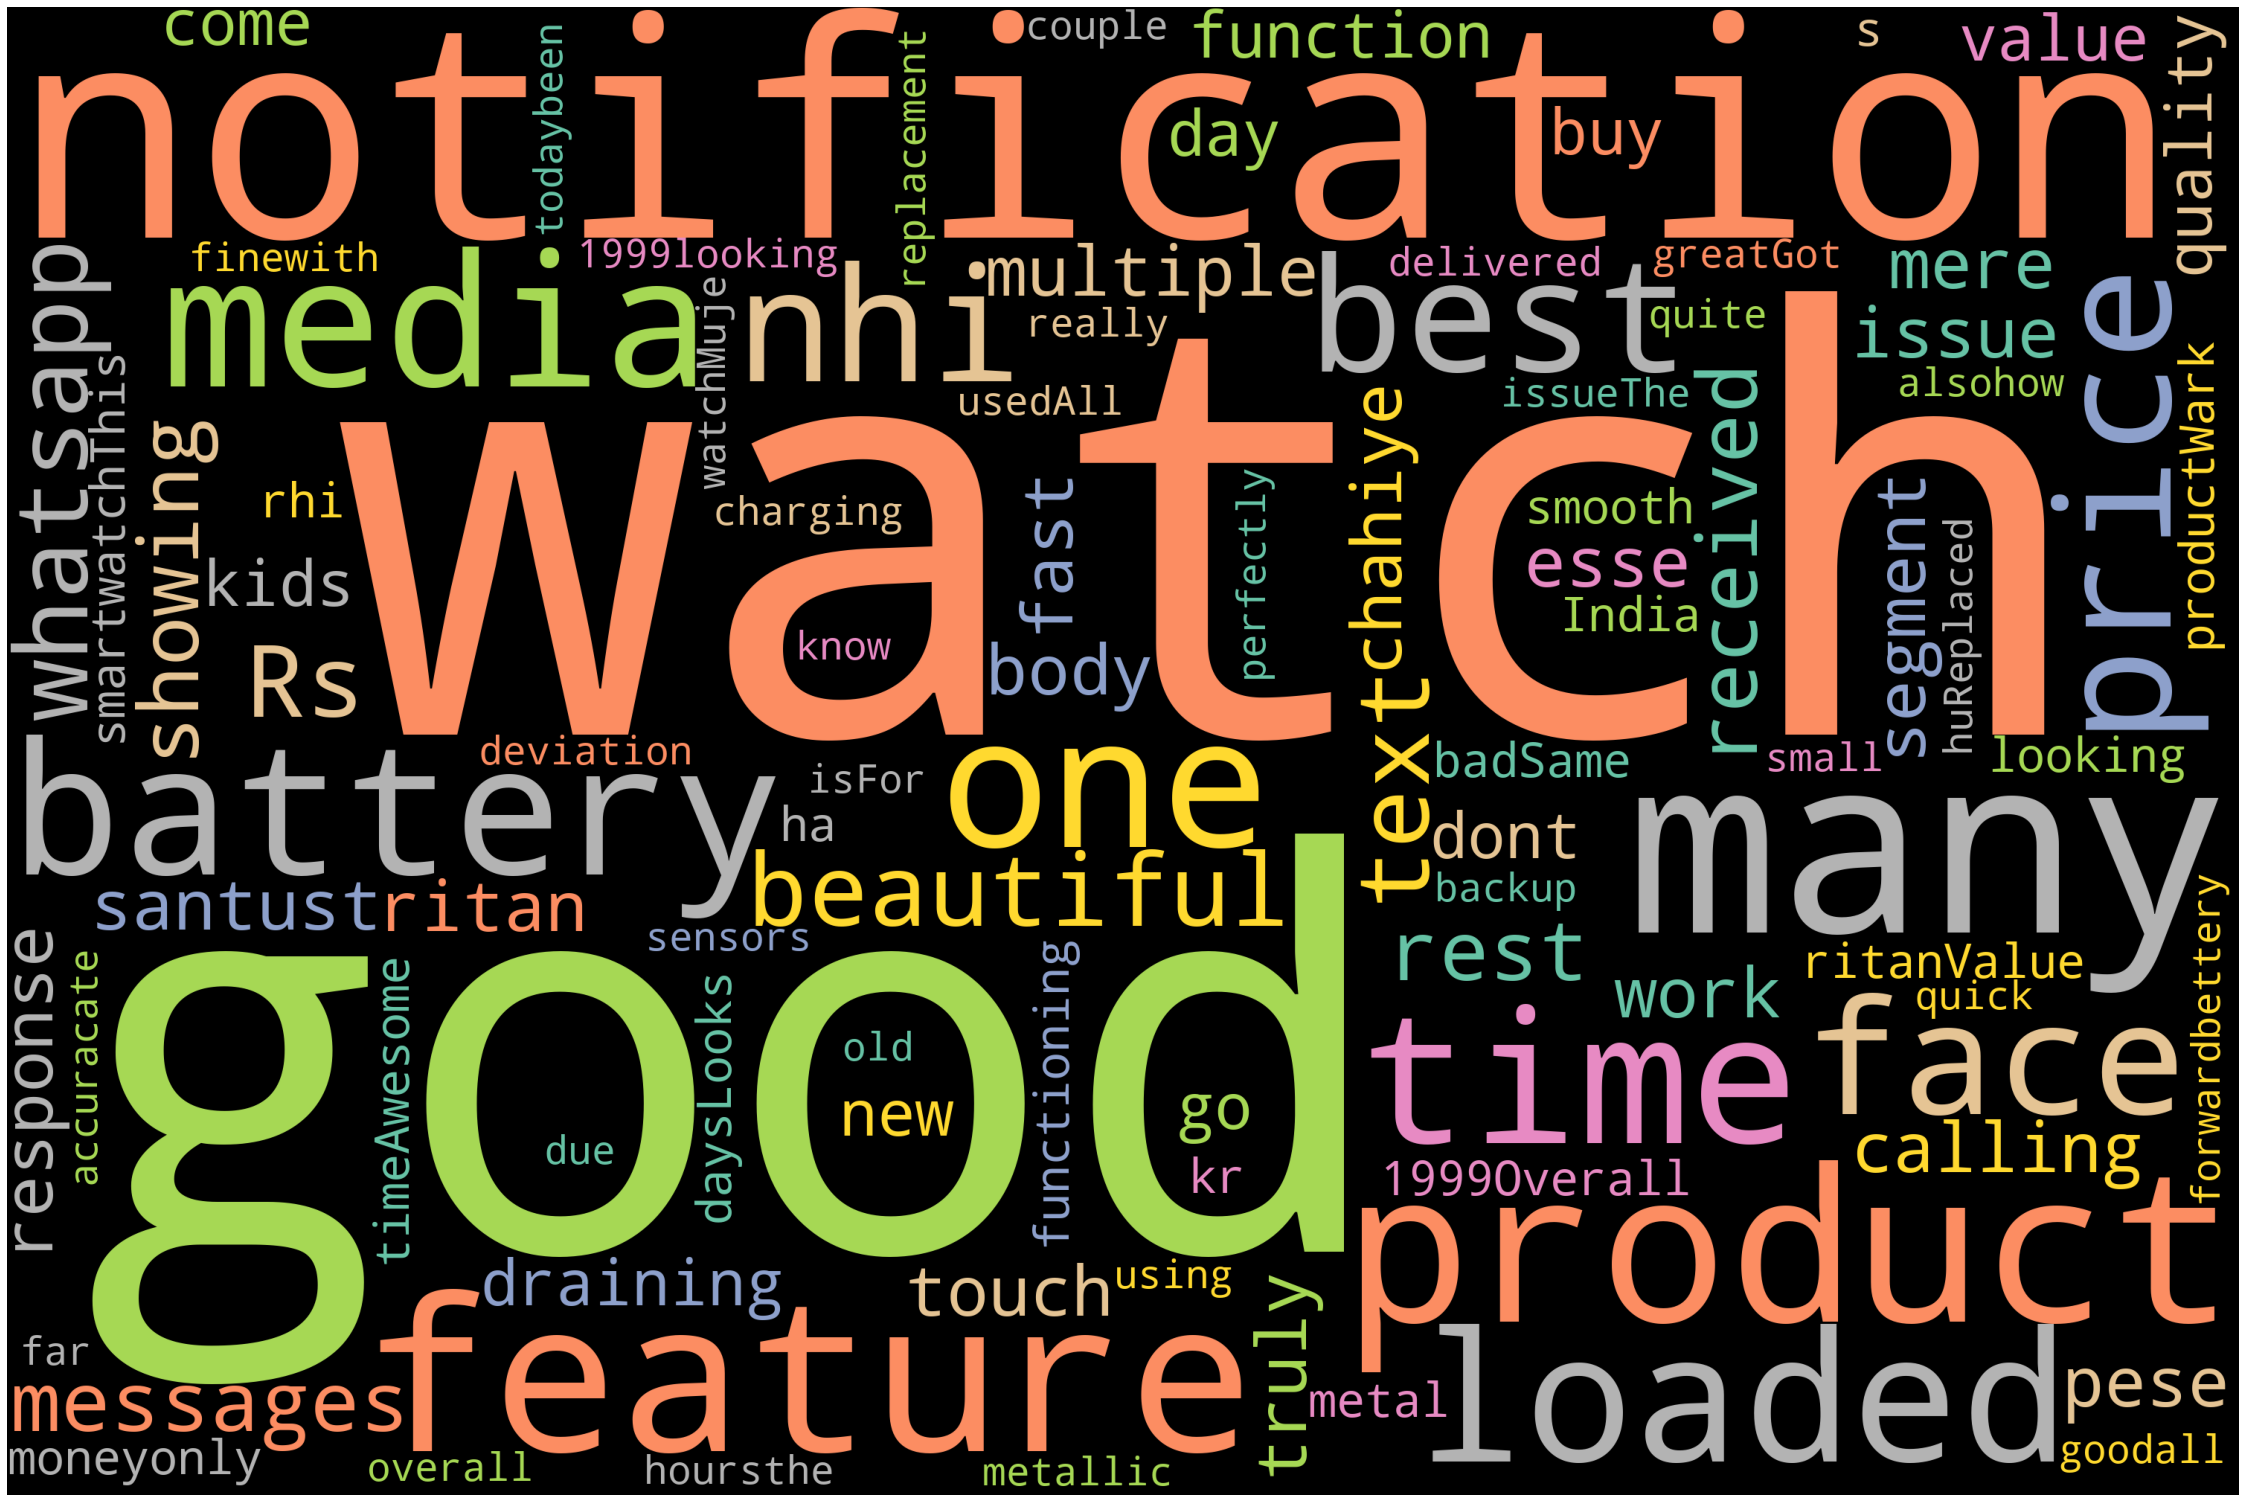

In [32]:
stopwords = STOPWORDS
stopwords.add('will')
wordcloud = WordCloud(width = 3000, height = 2000, background_color='black', max_words=100,colormap='Set2',stopwords=stopwords).generate(merged_reviews)
# Plot
plot_cloud(wordcloud)